<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Introdu%C3%A7%C3%A3o_Python/Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Regressão linear 
  - Método dos mínimos quadrados
  - Simples e múltipla
  - Ajustar a melhor reta que representa a distribuição dos pontos
  - Equação da reta: f(x) = ax + b


#### Descrição do método dos mínimos quadrados


- Vamos minimizar a função utilizando o método ods mínimos quadrados, representado por:

$ S(a,b) = ∑[y_{i} - f(x_{i})]^{2} = ∑[i_{i} - b - ax_{i}]^{2} $

Minimização acontece a partir da derivada de S:

$\frac{dS}{db} = ∑(-2)(y_{i} - b - ax_{i}) = 2[b(n+1)+a∑x_{i}-∑y_{i}]=0$

$\frac{dS}{da} = ∑(-2x_{i})(y_{i}-b-ax_{i}) = 2[b∑a_{i} + a∑x_{i}^{2} - ∑x_{i}y_{i} = 0$

Dividindo a eq 2 por 2(n+1):

$ b + a\frac{∑ x_{i}}{n+1} - \frac{∑y_{i}}{n+1} = 0$

$ b = y* - ax* $

Onde y* e x* são os valores médios

$x* = \frac{∑x_{i}}{n+1}$

$y* = \frac{∑y_{i}}{n+1}$

Dividindo a eq 3 por 2:

$ b∑x_{i} + a∑x_{i}^{2} - ∑x_{i}y_{i} = 0$

Substituindo a eq 5 na eq 8:

$ (y*-ax*)∑x_{i} + a∑x_{i}^{2} - ∑x_{i}y_{i} = 0 $

$ (\frac{∑y_{i}}{n+1} - a\frac{∑x_{i}}{n+1})∑x_{i} + a∑x_{i}^{2} - ∑x_{i}y_{i} = 0 $

$ \frac{1}{n+1}∑y_{i}∑x_{i} - \frac{a}{n+1}∑x_{i}∑x_{i} + a∑x_{i}^{2} - ∑x_{i}y_{i} = 0 $

$ ∑y_{i}x* - a∑x_{i}x* + a∑x_{i}^{2} - ∑x_{i}y_{i} $

$ a[∑ x_{i}^{2} - ∑x_{i}x*] = ∑x_{i}y_{i} - ∑y_{i}x* $

$ a ∑x_{i} (x_{i} - x* ) = ∑ y_{i}(x_{i} - x*) $

$ a = \frac{∑y_{i}(x_{i} - x*)}{∑x_{i}(x_{i} - x*)} $

$ b = y* - ax* $


#### Regressão linear simples e múltipla


- Regressãao linear usando Python
- Retirar dados da internet
- Exercício


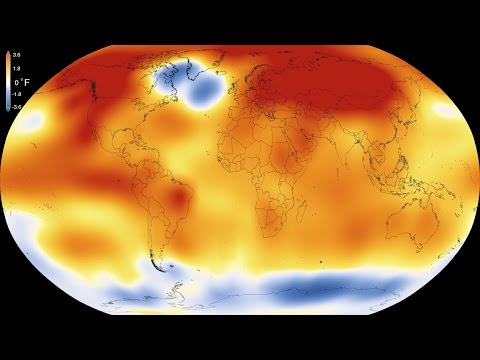

In [42]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlretrieve
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

#### Dados da temperatura média da superfície terrestre

In [8]:
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7f51b986ded0>)

In [9]:
fname = 'land_global_temperature_anomaly-1880-2016.csv'
year, temp_anomaly = np.loadtxt(fname, delimiter = ',', skiprows= 5, unpack = True)



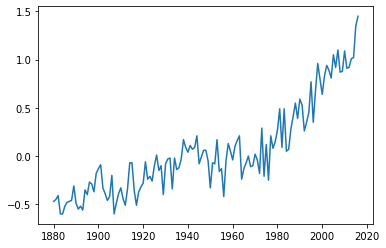

In [13]:
plt.plot(year, temp_anomaly)

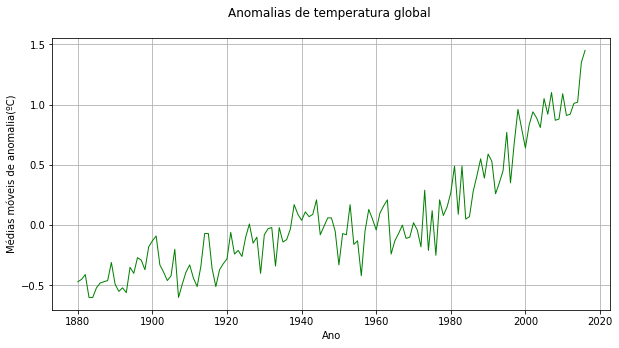

In [14]:
plt.figure( figsize = (10,5))
plt.plot (year, temp_anomaly, color = 'g', linestyle = '-', linewidth = 1)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()

In [15]:
def valor_medio(array):

  ''' 
  Calcula o valor médio de um array
  '''

  soma = 0 
  for elemento in array:
    soma += elemento
  media = soma/len(array)
  return media


In [20]:
year_mean = valor_medio(year)
print(year_mean)

temp_anomaly_mean = valor_medio(temp_anomaly)
print(temp_anomaly_mean)

print(np.mean(year))
print(np.mean(temp_anomaly))

1948.0
0.05262773722627737
1948.0
0.05262773722627735


$ a = \frac{∑y_{i}(x_{i} - x*)}{∑x_{i}(x_{i} - x*)} $

$ b = y* - ax* $


In [25]:
# Determinar o valor de a e b a partir do que foi definido acina na descrição da regressão

a = (np.sum(temp_anomaly*(year - np.mean(year))))/(np.sum(year * (year - np.mean(year))))
print(a)

b = np.mean(temp_anomaly) - a * np.mean(year)
print(b)

reg_lin = b + a*year

0.01037028394347266
-20.148685384658464


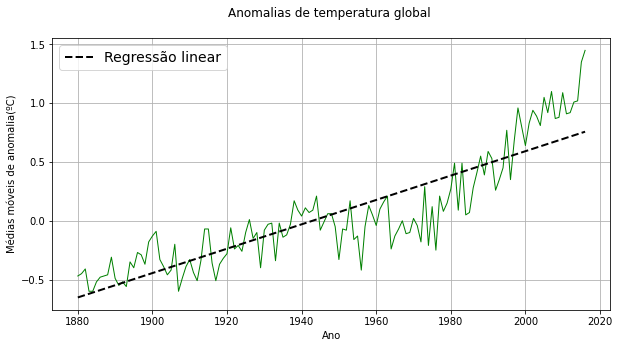

In [26]:
plt.figure( figsize = (10,5))
plt.plot (year, temp_anomaly, color = 'g', linestyle = '-', linewidth = 1)
plt.plot (year, reg_lin, color = 'black', linestyle = '--', linewidth = 2, label = 'Regressão linear')
plt.legend(loc = 'best', fontsize = 14)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()

#### Regressão linear usando numpy

In [36]:
a_novo, b_novo = np.polyfit(year, temp_anomaly, 1) # polyfit(x,y,grau da regressão - nesse caso linear (1))
f_linear = np.poly1d((a_novo, b_novo))  # Resulta na equação de regressão linear reg_lin = b + ax*

# f_linear permite identificar o valor associado as entradas
# f_linear(year)

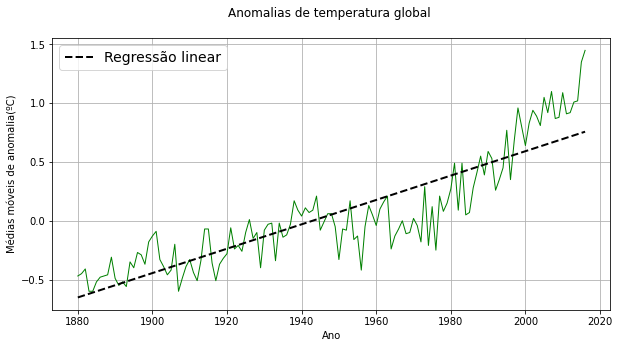

In [38]:

plt.figure( figsize = (10,5))
plt.plot (year, temp_anomaly, color = 'g', linestyle = '-', linewidth = 1)
plt.plot (year, f_linear(year), color = 'black', linestyle = '--', linewidth = 2, label = 'Regressão linear')
plt.legend(loc = 'best', fontsize = 14)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()

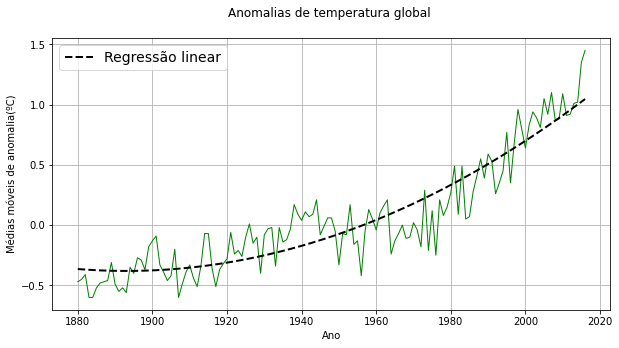

In [39]:
# Utilizando a mesma base para uma regressão quadrática ao invés de linear

a_q_novo, a_1_novo, b_1_novo = np.polyfit(year, temp_anomaly, 2) # Determinando as variaveis para reg quadratica
f_quad = np.poly1d((a_q_novo, a_1_novo, b_1_novo))

plt.figure( figsize = (10,5))
plt.plot (year, temp_anomaly, color = 'g', linestyle = '-', linewidth = 1)
plt.plot (year, f_quad(year), color = 'black', linestyle = '--', linewidth = 2, label = 'Regressão linear')
plt.legend(loc = 'best', fontsize = 14)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()

In [47]:
coef_corr_lin = scipy.stats.pearsonr(temp_anomaly, f_linear(year))
print(coef_corr_lin) # Retorna uma tupla com a correlação, e p-value

coef_corr_quad = scipy.stats.pearsonr(temp_anomaly, f_quad(year))
print(coef_corr_quad)

corr_np = np.corrcoef(temp_anomaly, f_linear(year))[0][1]
print(corr_np)

coef_det_lin = coef_corr_lin[0] ** 2
print(coef_det_lin)

coef_det_quad = coef_corr_quad[0] **2
print(coef_det_quad)

(0.8749403673678436, 2.3718423702190927e-44)
(0.9189836554568219, 2.0325632594440365e-56)
0.8749403673678438
0.7655206464497772
0.8445309589967828


#### Regressão linear simples 

$ y = b + ax $ 

#### Regressão linear múltipla

$ y = b + a_{1}x_{1} + a_{2}x_{2} +...+ a_{n}x_{n}$

#### Previsão da Emissão de CO2 de carro

Podemos prever a emissão de CO2 de um carro com base apenas no tamanho do motor?

Com a regressão multipla podemos incluir mais variáveis, como o peso do carro, para tomar a previsão mais precisa

Considere um dataset ficticio que contém:

- Marca do carro
- Modelo
- Volume do motor (cm³)
- Peso (kg)
- Emissão de CO2 (gCO2/km)

In [49]:
# Dataset quando transferido do dropbox vem com final dl=0, para utilizá-lo no python dl=1

df = pd.read_csv('https://www.dropbox.com/s/yevoao0jiu3d5la/data.csv?dl=1')
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [55]:
#! pip install statsmodels

import statsmodels.api as sm


In [60]:
# Sem constante

X = df[['Weight', 'Volume']] # Variáveis independentes 
Y = df['CO2'] # Variável depedente

model = sm.OLS(Y, X).fit() # Ordinary linear square (OLS) - regressão linear multipla
predictions = model.predict(X)
print(model.params)

model.summary()

Weight    0.064781
Volume    0.009736
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CO2   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              714.9
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                    1.67e-28
Time:                        14:34:18   Log-Likelihood:                         -149.96
No. Observations:                  36   AIC:                                      303.9
Df Residuals:                      34   BIC:                                      307.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0648      0.013      4.850      0.000       0.038       0.092
Volume         0.0097      0.011      0.919      0.365      -0.012       0.031
==============================================================================
Omnibus:                        2.430   Durbin-Watson:                   0.718
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.239
Skew:                           0.550   Prob(JB):                        0.327
Kurtosis:                       2.470   Cond. No.                         13.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Com constante

X = df[['Weight', 'Volume']] # Variáveis independentes 
Y = df['CO2'] # Variável depedente
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit() # Ordinary linear square (OLS) - regressão linear multipla
predictions = model.predict(X)
print(model.params)

model.summary()

const     79.694719
Weight     0.007551
Volume     0.007805
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           0.000411
Time:                        14:41:36   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.000      68.374      91.016
Weight         0.0076      0.006      1.173      0.249      -0.006       0.021
Volume         0.0078      0.004      1.948      0.060      -0.000       0.016
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
## Exercício - Dados de temperatura Curitiba

URL = 'https://www.dropbox.com/s/wplrldzidi8wppj/dados_T_83842_curitiba_anual.csv?dl=1'
urlretrieve(URL,'dados_T_83842_curitiba_anual.csv')

('dados_T_83842_curitiba_anual.csv',
 <http.client.HTTPMessage at 0x7f51a0dc5ed0>)

,1.961000000000000000e+03,1.748410958904110046e+01
0,1962.0,15.728000
1,1963.0,17.258959
2,1964.0,16.050849
3,1965.0,16.763956
4,1966.0,16.866630
5,1967.0,17.054247
6,1968.0,16.088156
7,1969.0,16.343178
8,1970.0,16.203462
9,1971.0,15.893516
